In [16]:
import os
from scipy.stats import truncnorm

In [38]:
def get_values_from_truncnorm(low_bound, high_bound, mean, std, size=1):
    """
    Сгенерировать массив чисел из обрезанного нормального распределения.
    Можно сгенерировать массив с одним числом
    ------------
    low_bound - float, int. Нижняя граница значений
    high_bound - float, int. Верхняя граница значений 
    mean - float, int. Среднее
    std - float, int. Стандартное отклонение
    size - Количество чисел в возвращаемом массиве
    ------------
    Возвращает np.ndarray
    """
    return truncnorm.rvs((low_bound - mean) / std, (high_bound - mean) / std, loc=mean, scale=std, size=size)

In [17]:
total_txns = 20000
avg_num_per_client = 20 # Среднее кол-во на клиента
txn_num_std = 10 # Стандартное откл. кол-ва транзакций на клиента
low_bound = 1 # мин. транз-ций на клиента
up_bound = 120 # макс. транз-ций на клиента

avg_total = total_txns
est_clients = total_txns / avg_num_per_client
total_std = txn_num_std * est_clients
total_low = 1 * est_clients
total_up = 120 * est_clients

In [76]:
a = (total_low - avg_total) / total_std
b = (total_up - avg_total) / total_std
dist01 = norm(loc=avg_total, scale=total_std)

In [ ]:
dist01.ppf(0.95)

In [53]:
all_runs = []
rand_txn_nums = []
for _ in range(100):
    for _ in range(est_clients):
        rand_txn_nums.append(round(get_values_from_truncnorm(low_bound=low_bound, high_bound=up_bound, \
                                                             mean=avg_num_per_client, std=txn_num_std)[0]))
    rand_nums_sum = sum(rand_txn_nums)
    rand_txn_nums.clear()
    all_runs.append(rand_nums_sum)

In [54]:
min(all_runs), max(all_runs)

(19968, 21349)

Text(0.5, 1.0, 'Распределение общего числа транзакций')

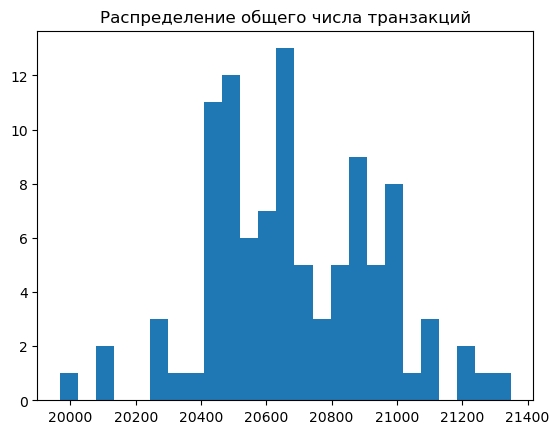

In [59]:
import matplotlib.pyplot as plt
plt.hist(all_runs, bins=25)
plt.title("Распределение общего числа транзакций")

np.float64(36589.37713944947)

In [125]:
from scipy.stats import truncnorm
import numpy as np

total_txns = 50000
avg_num_per_client = 30
txn_num_std = 10
low_bound = 1
up_bound = 120

est_clients = int(total_txns / avg_num_per_client)

# параметры отдельной транзакции на клиента
a = (low_bound - avg_num_per_client) / txn_num_std
b = (up_bound - avg_num_per_client) / txn_num_std
per_client_dist = truncnorm(a=a, b=b, loc=avg_num_per_client, scale=txn_num_std)

In [126]:
samples = per_client_dist.rvs(size=(10000, est_clients))
sum_txns = samples.sum(axis=1)

In [127]:
mean_sum = est_clients * per_client_dist.mean()
std_sum = np.sqrt(est_clients) * per_client_dist.std()

In [128]:
mean_sum, std_sum

(np.float64(50079.354567186376), np.float64(404.61437490963584))

In [152]:
fraud_rate = 0.04499054820415879
compr_share = 0.7

legit_count = round(mean_sum + 3*std_sum)
# подсчет количества транзакций равных 1% от всех транзакций
# т.к. не все транзакции еще созданы, то считаем основываясь на количестве 
# легальных транзакций и fraud rate
one_perc = round(legit_count / ((1 - fraud_rate) * 100))
# Абсолютное кол-во всего фрода
fraud_abs = one_perc * fraud_rate * 100
# Абсолютное кол-во фрод транзакций умножаем на долю транзакций compromised фрода
clients_count = round(fraud_abs * compr_share)
clients_count, est_clients, est_clients/fraud_abs // 0.01 * 0.01

(1691, 1666, 0.68)

In [151]:
# est_clients / (one_perc * fraud_rate * 100)
# fraud_rate = est_clients / (one_perc * 100)
# clients_count = (one_perc * fraud_rate * 100) * compr_share
fraud_rate = est_clients / (one_perc * 100 * compr_share)
fraud_rate

0.04499054820415879

In [154]:
os.getcwd()

'C:\\Users\\iaros\\My_documents\\Education\\projects\\fraud_detection_01\\notebooks'

In [155]:
os.chdir("..")

In [158]:

from test01 import bimbus

In [159]:
bimbus

'aboba galaboba'

In [93]:
from scipy.stats import norm
approx_dist = norm(loc=mean_sum, scale=std_sum)

In [94]:
addition = 0
mul = 3
mean = approx_dist.mean()
std = approx_dist.std()
print(f"""mean: {round(mean)}
std: {round(std)}
addition: {addition}""")
# approx_dist.cdf(mean + std + addition) - approx_dist.cdf(mean - std - addition)
1 - approx_dist.cdf(mean + std*mul) - approx_dist.cdf(mean - std*mul)
294 * mul

mean: 10338
std: 208
addition: 0


882

(78, 500)

In [77]:
addition = 0
mean = dist01.mean()
std = dist01.std()
print(f"""mean: {round(mean)}
std: {round(std)}
addition: {addition}""")
dist01.cdf(mean + std + addition) - dist01.cdf(mean - std - addition)

mean: 20000
std: 10000
addition: 0


np.float64(0.6826894921370859)

In [78]:
0.6826894921370859 - 0.6826894921370856

2.220446049250313e-16

Text(0.5, 1.0, 'Распределение общего числа транзакций')

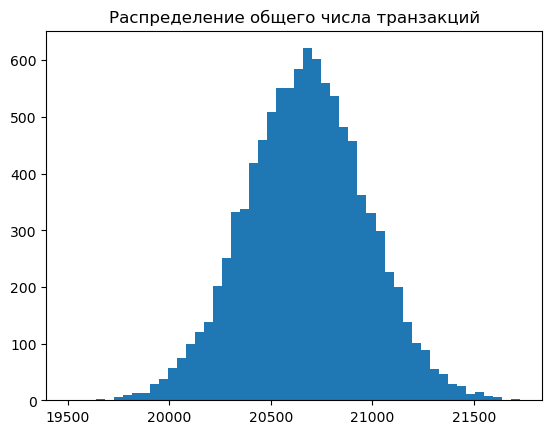

In [36]:
import matplotlib.pyplot as plt
plt.hist(sum_txns, bins=50)
plt.title("Распределение общего числа транзакций")

In [ ]:
addition = 8000
dist01.cdf(avg_total + total_std + addition) - dist01.cdf(avg_total - total_std - addition)

In [14]:
import itertools, sys, time
def spinner(static_text):
    """
    """
    spinner = itertools.cycle(['', '..', '....', '.....'])
    i = 0
    while i < 10:
        text = next(spinner)
        sys.stdout.write('\r' + static_text + text + ' ' * 10)  # перезаписываем строку + очищаем остатки
        sys.stdout.flush()
        time.sleep(1)
        i += 1
    
    sys.stdout.write('\nDone.\n')

# print("done with spinner")

In [15]:
spinner("Generating legit txns")

Generating legit txns..             
Done.


In [2]:
os.listdir(r"C:\Users\iaros\My_documents\Education\projects\fraud_detection_01\notebooks")

['.ipynb_checkpoints',
 '01_data_cleaning.ipynb',
 '02_cleaned_data_to_sql_db.ipynb',
 '03_geo_data_generation.ipynb',
 '03_whole_notebook_data_generation_v2.ipynb',
 '04_ip_addresses_generation.ipynb',
 '05COMMON_time_time_patterns_generation_30-06-2025.ipynb',
 '05DUPLICATE.ipynb',
 '05WHOLE_NB_time_patterns_generation_18-06-25.ipynb',
 '05_time_patterns_generation.ipynb',
 '06_devices_and_online_merchants.ipynb',
 '07v1_legit_transactions_generation.ipynb',
 '07v2_legit_transactions_generation.ipynb',
 '08_purchase_fraud_generation.ipynb',
 '09_drop_txns_generation.ipynb',
 'Untitled.ipynb']

In [ ]:
	# 1. 01_data_cleaning
	# 2. 02_geo_data_generation
	# 3. 03_ip_addresses_generation
	# 4. 06_devices_and_online_merchants
	# 5. 05_time_patterns_generation
	# 6. other_additional_data
	# 7. 07v2_legit_transactions_generation
	# 8. 08_purchase_fraud_generation
	# 9. 09_drop_txns_generation
	# 10. data_to_sql_db